# Principal Component Analysis

** Importing libraries and load the item data **

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import  PCA

** Importing the full item data that we saved before.(item_data.csv)**


In [34]:
item_data = pd.read_csv('item_data.csv', index_col=['CustomerID'])
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90204,90205A,90205C,90208,90209A,90209C,C2,D,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,10


Confirming, this dataset should have 2796 features as created before:

In [35]:
item_data.shape

(422, 2796)

<span id="item-data"></span>
# Item data - Principal Component Analysis


<br>
**First, scale <code style="color:crimson">item_data</code>,  imported just before.**


In [36]:
# Initialize instance of StandardScaler
sc = StandardScaler()

# Fit and transform item_data
item_data_scaled = sc.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13647354, -0.04873702, -0.11083616, ..., -0.08461622,
        -0.17314913, -0.67616652],
       [-0.13647354, -0.04873702, -0.11083616, ..., -0.08461622,
        -0.17314913,  0.37821601],
       [-0.13647354, -0.04873702, -0.11083616, ..., -0.08461622,
        -0.17314913, -0.41257089],
       [-0.13647354, -0.04873702, -0.11083616, ..., -0.08461622,
        -0.17314913, -0.41257089],
       [-0.13647354, -0.04873702, -0.11083616, ..., -0.08461622,
         5.5954509 ,  0.64181164]])

**Initialize and fit an instance of the PCA transformation.**
* Keeping all of the components for now, not passing any argument

In [37]:
# Initialize and fit a PCA transformation
pca = PCA()

**Generating new "principal component features" from <code style="color:crimson">item_data_scaled</code>.**


In [38]:
# Generate new features
PC = pca.fit_transform(item_data_scaled)

# Display first 5 rows
PC[:5]

array([[  5.18063695e+00,   7.18817541e-01,   1.54869085e+00, ...,
         -2.14468752e-05,   9.72318157e-15,   2.89688263e-17],
       [ -3.36799957e+00,  -3.44660478e+00,   7.61253706e-01, ...,
         -1.62949609e-04,   9.72318157e-15,   2.89688263e-17],
       [ -5.69099637e-01,  -1.70242298e+00,   9.93408600e-01, ...,
         -2.05530000e-05,   9.72318157e-15,   2.89688263e-17],
       [ -3.94259639e+00,  -3.81790283e+00,   1.18687857e+00, ...,
          4.42773390e-05,   9.72318157e-15,   2.89688263e-17],
       [ -1.10374112e+00,  -2.81086284e+00,   1.96949080e+00, ...,
         -4.06654854e-05,   9.72318157e-15,   2.89688263e-17]])

# Explained variance


**Here we will calculate and plot the <u>cumulative</u> explained variance.**
* We'll plot it so we can see how many $PC$ features we'd need to keep in order to capture most of the original variance.

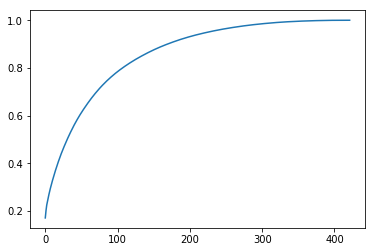

In [39]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.show()

In [40]:
# How much variance we'd capture with the first 150 components
cumulative_explained_variance[150]

0.87588010485156753

**Initialize and fit another PCA transformation.**
* This time, only keep 150 components.
* Generate the principal component features from the fitted instance and name the new matrix <code style="color:crimson">PC_items</code>.
* Then, display the shape of <code style="color:crimson">PC_items</code> to confirm it only has 150 features.

In [41]:
# Initialize PCA transformation, only keeping 150 components
pca = PCA(n_components=150)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(422, 150)

** Just for convenience, let's put <code style="color:steel blue">PC_items</code> into a new dataframe.**


In [42]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i+1) for i in range(items_pca.shape[1])]

# Update its index
items_pca.index = item_data.index

items_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.180637,0.718818,1.548691,-0.007762,-2.314253,-2.536359,0.967663,-0.735692,0.997183,6.819645,...,-0.042104,0.093376,0.351750,-0.214040,0.501834,0.015862,-0.083576,0.101375,-0.669811,-0.598750
12348,-3.368000,-3.446605,0.761256,0.806926,-1.031881,-1.086750,-0.431494,0.157940,-0.439192,-0.363441,...,-0.358197,1.824972,-2.023484,4.609122,-0.592557,1.290693,0.747739,1.847241,-1.347301,3.298932
12349,-0.569100,-1.702421,0.993412,0.784203,0.098077,-1.821577,-1.916209,-0.307812,-0.832751,1.634552,...,-0.976433,-0.931319,-4.301407,-1.629662,2.996648,-2.416725,-2.805716,-5.851804,-0.940464,0.054525
12350,-3.942596,-3.817902,1.186881,-0.839754,-1.408507,0.811212,-0.541209,0.313549,0.416172,0.503025,...,-1.509877,0.895428,0.005363,0.122255,0.043803,-0.790864,-1.352551,0.643589,1.868195,0.379954
12352,-1.103741,-2.810859,1.969488,0.505542,-0.162706,-0.785703,-0.266457,0.285660,1.801607,1.068215,...,4.195378,-5.235860,-1.154305,3.805815,-2.249280,-3.572425,1.493253,-3.281115,-0.906054,1.684750


**Finally, save this item dataframe with PCA features as <code style="color:crimson">'pca_item_data.csv'</code>.**
* We will compare the clusters made from using these features against those in <code style="color:crimson">'threshold_item_data.csv'</code>.


In [43]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')